In [1]:
import pandas as pd

print("Apple Company Stock file")
data = pd.read_csv('C:\\Users\\Himika\\Desktop\\code_alpha\\HistoricalQuotes.csv')

print(data.head())

Apple Company Stock file
         Date  Close/Last     Volume      Open      High       Low
0  02/28/2020     $273.36  106721200   $257.26   $278.41   $256.37
1  02/27/2020     $273.52   80151380    $281.1      $286   $272.96
2  02/26/2020     $292.65   49678430   $286.53   $297.88    $286.5
3  02/25/2020     $288.08   57668360   $300.95   $302.53   $286.13
4  02/24/2020     $298.18   55548830   $297.26   $304.18   $289.23


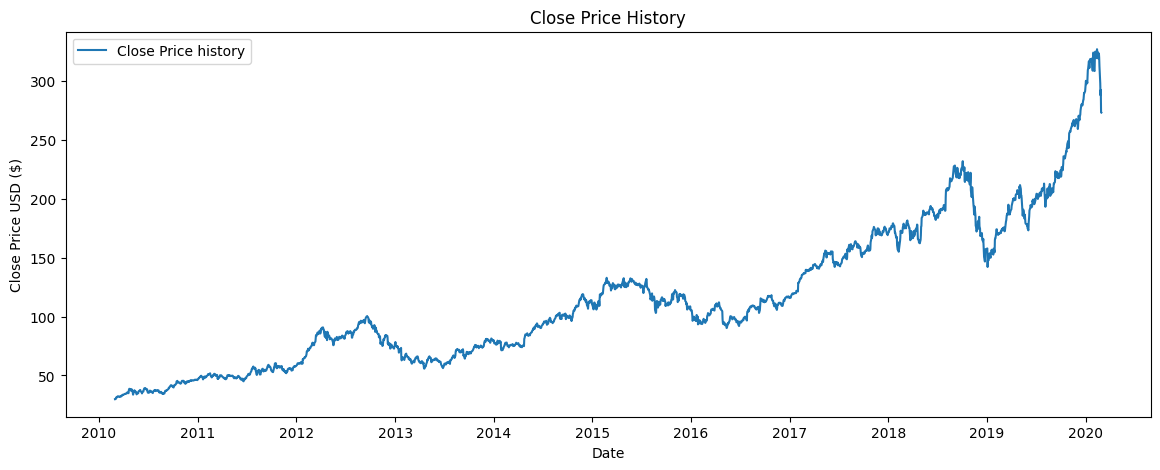

1955/1955 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - loss: 0.0018
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


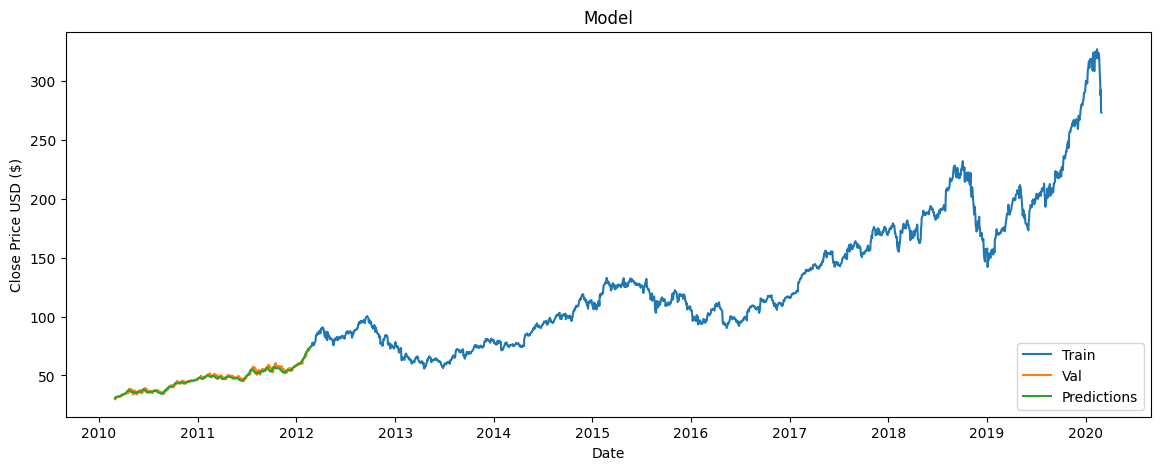

            Close/Last  Predictions
Date                               
2012-02-24     74.6300    74.792572
2012-02-23     73.7700    74.473465
2012-02-22     73.2914    74.045525
2012-02-21     73.5500    73.549217
2012-02-17     71.7314    73.086449
...                ...          ...
2010-03-05     31.2786    31.829773
2010-03-04     30.1014    31.716106
2010-03-03     29.9043    31.486551
2010-03-02     29.8357    31.189863
2010-03-01     29.8557    30.875320

[503 rows x 2 columns]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
%matplotlib inline

# Clean up the column names
data.columns = [col.strip() for col in data.columns]

data = data[['Date', 'Close/Last']]  
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Remove any dollar signs and convert to float
data['Close/Last'] = data['Close/Last'].str.replace('$', '').astype(float)

# Plot the closing price history
plt.figure(figsize=(14, 5))
plt.plot(data, label='Close Price history')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.show()

# Prepare the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create the training data set
train_data_len = int(np.ceil(len(scaled_data) * 0.8))

train_data = scaled_data[0:int(train_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data for the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# testing data set
test_data = scaled_data[train_data_len - 60:, :]

x_test = []
y_test = data[train_data_len:].values

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

# Reshaping data model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Plot the data
train = data[:train_data_len]
valid = data[train_data_len:].copy()  # .copy() to avoid SettingWithCopyWarning
valid['Predictions'] = predictions

plt.figure(figsize=(14, 5))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close/Last'])
plt.plot(valid[['Close/Last', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
print(valid)
